# **Predicting Car Prices: A Machine Learning Journey**





***The goal of this project is to analyze the dataset, preprocess the data, apply machine learning models, and evaluate their performance in predicting car prices.***

# **Mounting Google Drive in Google Colab**


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# **Importing Necessary Libraries for Machine Learning and Data Analysis**









In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## ***Section 1: Data Exploration (EDA)***

## 1.1 Loading the Data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/cars_price.csv")


In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,NaN,mpfi,3.47,2.68,9.0,111,NaN,21.0,27.0,13495
1,3.0,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111,NaN,21.0,27.0,16500
2,1.0,?,alfa-romero,gas,std,two,hatchback,rwd,NaN,94.5,...,152.0,mpfi,NaN,3.47,9.0,154,NaN,19.0,26.0,16500
3,2.0,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,NaN,10.0,102,5500,24.0,30.0,13950
4,2.0,164,audi,gas,std,NaN,sedan,4wd,front,99.4,...,136.0,mpfi,NaN,3.4,8.0,115,5500,18.0,22.0,17450


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30330 entries, 0 to 30329
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          27286 non-null  float64
 1   normalized-losses  27294 non-null  object 
 2   make               27228 non-null  object 
 3   fuel-type          27309 non-null  object 
 4   aspiration         27355 non-null  object 
 5   num-of-doors       27321 non-null  object 
 6   body-style         27326 non-null  object 
 7   drive-wheels       27215 non-null  object 
 8   engine-location    27352 non-null  object 
 9   wheel-base         27264 non-null  float64
 10  length             27258 non-null  float64
 11  width              27387 non-null  float64
 12  height             27281 non-null  float64
 13  curb-weight        27302 non-null  float64
 14  engine-type        27285 non-null  object 
 15  num-of-cylinders   27298 non-null  object 
 16  engine-size        272

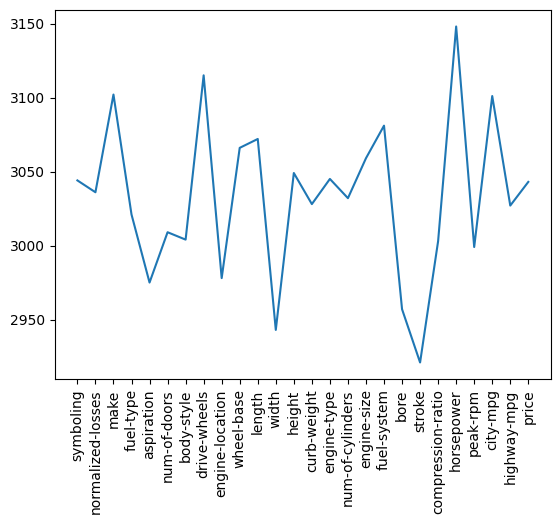

In [ ]:
x = df.isnull().sum()
plt.plot(x)
plt.xticks(rotation=90)
plt.show()

## 1.2 Statistical Summary and Distributions

In [ ]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,27286.000000,27264.000000,27258.000000,27387.000000,27281.000000,27302.000000,27271.000000,27327.000000,27229.000000,27303.000000
mean,0.839075,98.807875,174.158302,65.918114,53.732059,2560.265988,127.322834,10.128243,25.158507,30.709885
std,1.239600,6.037800,12.366150,2.143679,2.438541,522.483478,41.863332,3.943566,6.517298,6.862626
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.500000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.500000,66.900000,55.500000,2954.000000,146.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [ ]:
print(df['curb-weight'].skew())

0.6634854302785074


In [ ]:
df_num = df.select_dtypes(include=['int64', 'float64'])
print(df_num.shape)

(30330, 10)


In [ ]:
df_cat = df.select_dtypes(include=['object'])
print(df_cat.shape)

(30330, 16)


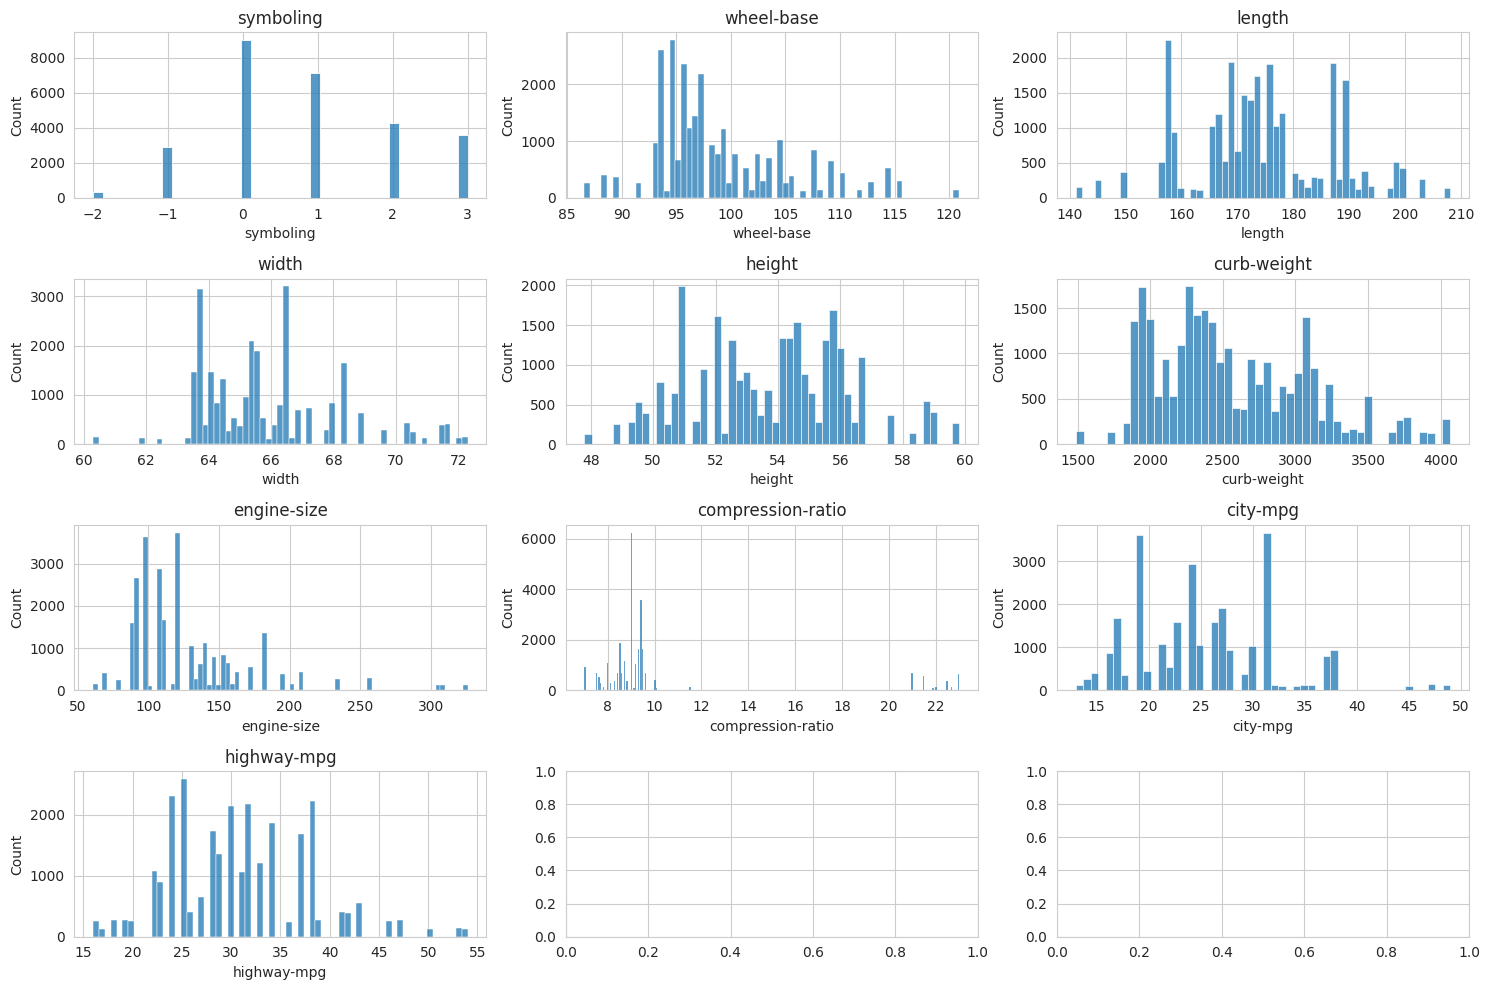

In [ ]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, column in enumerate(df_num.columns):
    sns.histplot(df_num[column], ax=axes[i])
    axes[i].set_title(column)
plt.tight_layout()
plt.show()

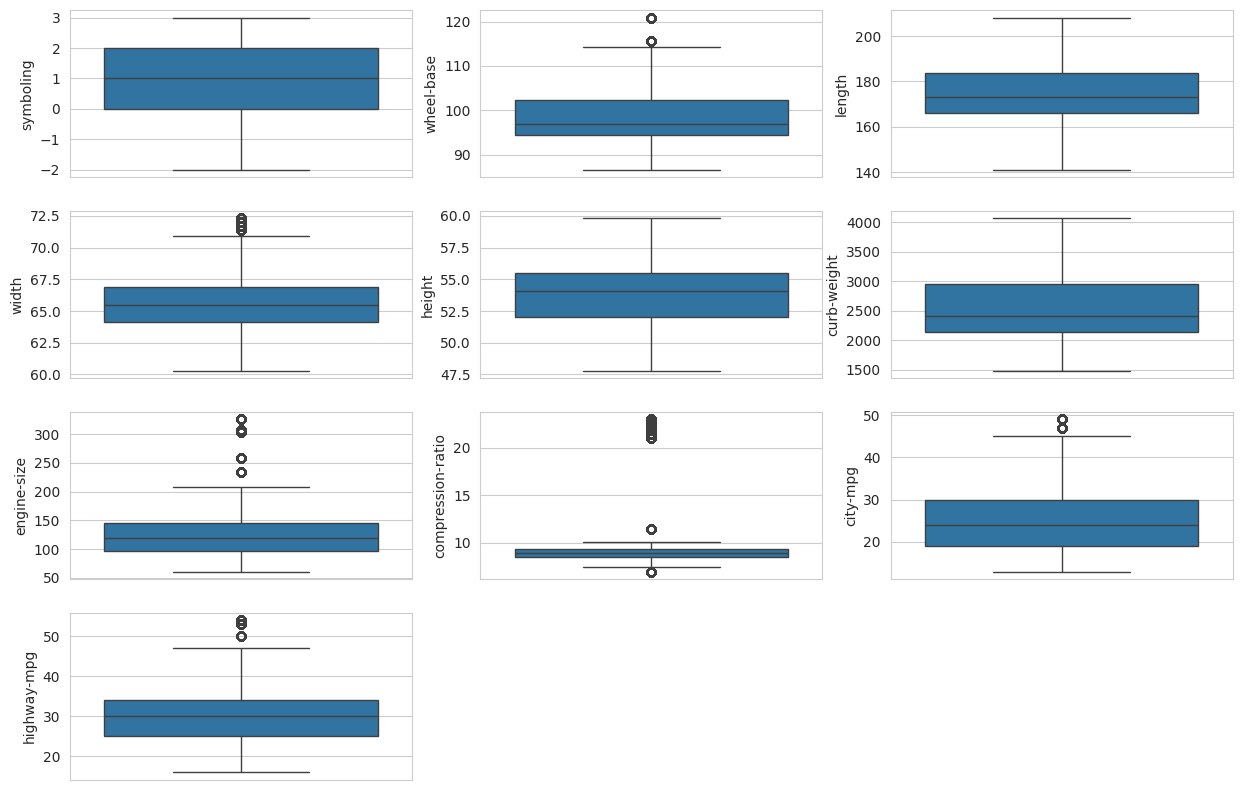

In [ ]:
figure = plt.figure(figsize=(15, 10))
for i, column in enumerate(df_num.columns):
  plt.subplot(4, 3, i+1)
  sns.boxplot(df_num[column])
plt.show()

In [ ]:
print(df_num.skew())

symboling            0.222439
wheel-base           1.036002
length               0.142167
width                0.886104
height               0.066674
curb-weight          0.663485
engine-size          1.895392
compression-ratio    2.600568
city-mpg             0.670895
highway-mpg          0.552298
dtype: float64


The skewness of more than 1 requires transformation for regression modelling.





In [ ]:
df_reg = pd.DataFrame(df)
df_reg['wheel-base'] = np.log1p(df_reg['wheel-base'])
df_reg['engine-size'] = np.log1p(df_reg['engine-size'])
df_reg['compression-ratio'] = np.log1p(df_reg['compression-ratio'])
df_reg_num = df_reg.select_dtypes(include=['int64', 'float64'])
print(df_reg_num.skew())

symboling            0.222439
wheel-base           0.874010
length               0.142167
width                0.886104
height               0.066674
curb-weight          0.663485
engine-size          0.836621
compression-ratio    2.368462
city-mpg             0.670895
highway-mpg          0.552298
dtype: float64


In [ ]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
df_reg['compression-ratio'] = pt.fit_transform(df_reg[['compression-ratio']])

In [ ]:
print(df_reg['compression-ratio'].skew())

-0.039631763577591336


## 1.3 Relationships Between Features

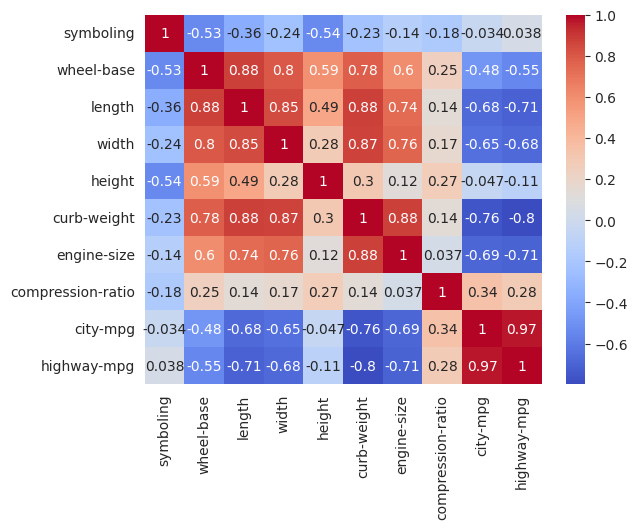

In [ ]:
df_reg_corr = df_reg_num.corr()
sns.heatmap(df_reg_corr, annot=True, cmap='coolwarm')
plt.show()

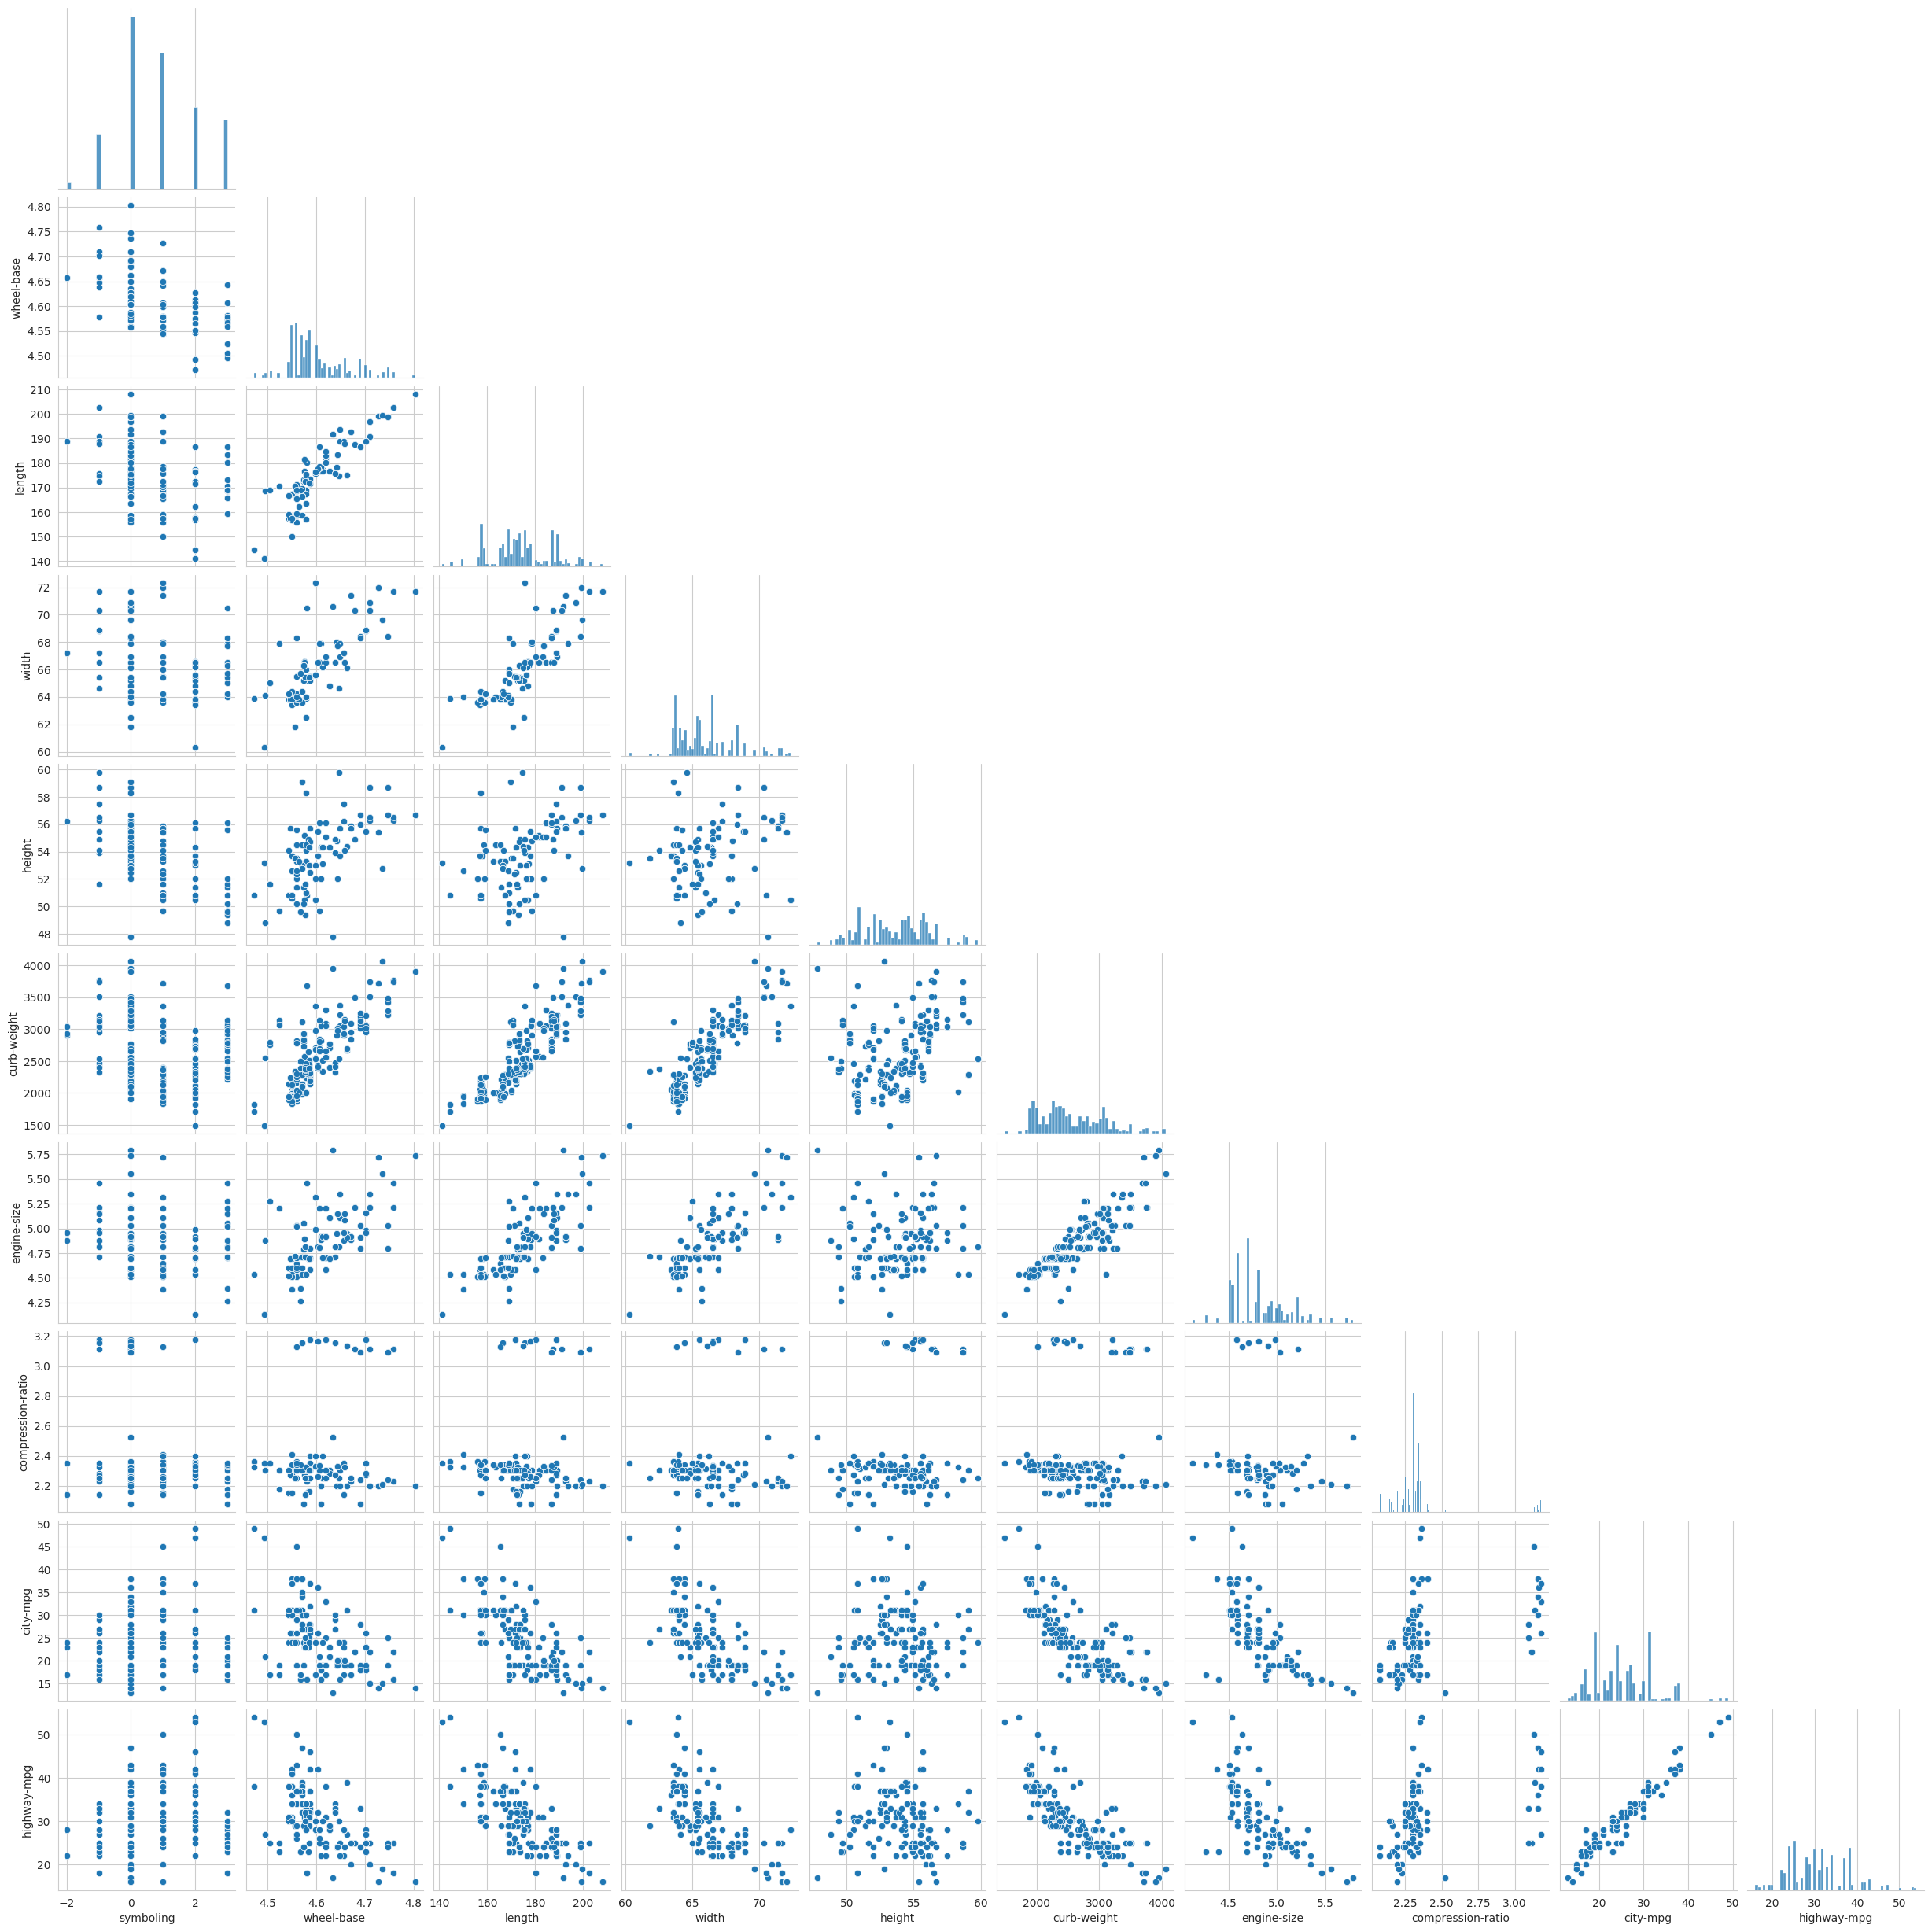

In [ ]:
sns.pairplot(df_reg_num,corner=True)
plt.show()

The correlation matrix and the pairplots show that the correlated features have a somewhat linear relationship and regression will work.

In [ ]:
df_reg.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [ ]:
df_reg['price'] = pd.to_numeric(df_reg['price'], errors='coerce')

In [ ]:
pd.pivot_table(df_reg, index='fuel-type', values='price').sort_values(by='price', ascending=False)

,price
fuel-type,
diesel,16106.236786
gas,12923.557840


In [ ]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30330 entries, 0 to 30329
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          27286 non-null  float64
 1   normalized-losses  27294 non-null  object 
 2   make               27228 non-null  object 
 3   fuel-type          27309 non-null  object 
 4   aspiration         27355 non-null  object 
 5   num-of-doors       27321 non-null  object 
 6   body-style         27326 non-null  object 
 7   drive-wheels       27215 non-null  object 
 8   engine-location    27352 non-null  object 
 9   wheel-base         27264 non-null  float64
 10  length             27258 non-null  float64
 11  width              27387 non-null  float64
 12  height             27281 non-null  float64
 13  curb-weight        27302 non-null  float64
 14  engine-type        27285 non-null  object 
 15  num-of-cylinders   27298 non-null  object 
 16  engine-size        272

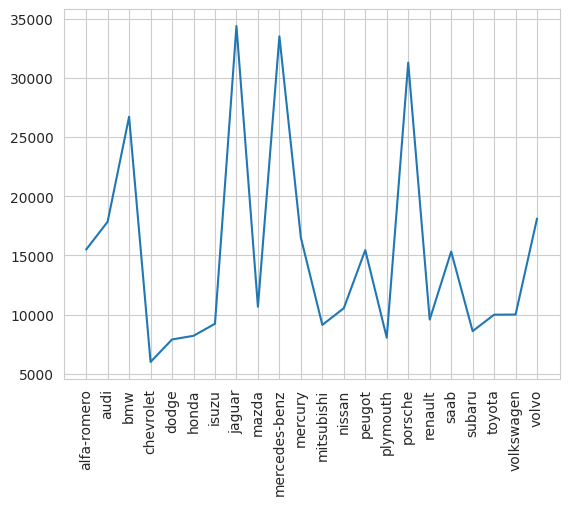

In [ ]:
plt.plot(df_reg.groupby('make')['price'].mean())
plt.xticks(rotation=90)
plt.show()

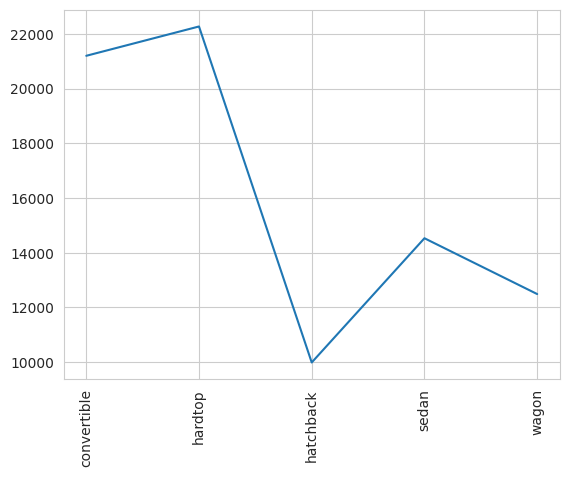

In [ ]:
plt.plot(df_reg.groupby('body-style')['price'].mean())
plt.xticks(rotation=90)
plt.show()

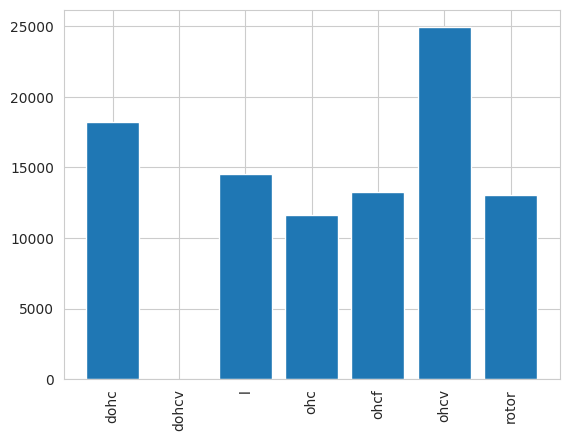

In [ ]:
plt.bar(df_reg.groupby('engine-type')['price'].mean().index, df_reg.groupby('engine-type')['price'].mean().values)
plt.xticks(rotation=90)
plt.show()

# ***Section 2: Data Preprocessing***

# Section 2: Data Preprocessing

In [ ]:
(df_reg.isnull().sum()/df_reg.shape[0]*100).sort_values(ascending=False)

,0
price,11.889219
horsepower,10.379163
drive-wheels,10.270359
make,10.227498
city-mpg,10.224200
fuel-system,10.158259
length,10.128586
wheel-base,10.108803
engine-size,10.085724
height,10.052753


In [ ]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30330 entries, 0 to 30329
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          27286 non-null  float64
 1   normalized-losses  27294 non-null  object 
 2   make               27228 non-null  object 
 3   fuel-type          27309 non-null  object 
 4   aspiration         27355 non-null  object 
 5   num-of-doors       27321 non-null  object 
 6   body-style         27326 non-null  object 
 7   drive-wheels       27215 non-null  object 
 8   engine-location    27352 non-null  object 
 9   wheel-base         27264 non-null  float64
 10  length             27258 non-null  float64
 11  width              27387 non-null  float64
 12  height             27281 non-null  float64
 13  curb-weight        27302 non-null  float64
 14  engine-type        27285 non-null  object 
 15  num-of-cylinders   27298 non-null  object 
 16  engine-size        272

In [ ]:
num_cols = df_reg.select_dtypes(include=['number']).columns
cat_cols = df_reg.select_dtypes(include=['object']).columns
num_imputer = SimpleImputer(strategy='median')
df_reg[num_cols] = num_imputer.fit_transform(df_reg[num_cols])
cat_imputer = SimpleImputer(strategy='most_frequent')
df_reg[cat_cols] = cat_imputer.fit_transform(df_reg[cat_cols])
print(df_reg.isnull().sum())

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


## 2.2 Encoding Categorical Features

In [ ]:
for col in df_reg.select_dtypes(include=['object']).columns:
    print(f"Column: {col}")
    print(df_reg[col].unique(), "\n")

Column: normalized-losses
['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '161'
 '153' '125' '128' '103' '122' '108' '194' '231' '119' '154' '74' '186'
 '83' '102' '89' '87' '77' '91' '168' '134' '65' '197' '90' '94' '256'
 '95' '142'] 

Column: make
['alfa-romero' 'audi' 'toyota' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu'
 'jaguar' 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'volkswagen' 'volvo'] 

Column: fuel-type
['gas' 'diesel'] 

Column: aspiration
['std' 'turbo'] 

Column: num-of-doors
['two' 'four' '?'] 

Column: body-style
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop'] 

Column: drive-wheels
['rwd' 'fwd' '4wd'] 

Column: engine-location
['front' 'rear'] 

Column: engine-type
['dohc' 'ohc' 'ohcv' 'l' 'rotor' 'ohcf' 'dohcv'] 

Column: num-of-cylinders
['four' 'six' 'five' 'three' 'two' 'eight' 'twelve'] 

Column: fu

In [ ]:
df_reg.replace("?", np.nan, inplace=True)

In [ ]:
num_cols = ['bore', 'stroke', 'horsepower','peak-rpm','normalized-losses']  # Replace with actual column names

for col in num_cols:
    df_reg[col] = pd.to_numeric(df_reg[col])

In [ ]:
df_reg[num_cols] = df_reg[num_cols].fillna(df_reg[num_cols].median())

In [ ]:
df_reg['num-of-doors'] = df_reg['num-of-doors'].fillna(df_reg['num-of-doors'].mode()[0])

In [ ]:
for col in df_reg.select_dtypes(include=['object']).columns:
    print(f"Column: {col}")
    print(df_reg[col].unique(), "\n")

Column: make
['alfa-romero' 'audi' 'toyota' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu'
 'jaguar' 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'volkswagen' 'volvo'] 

Column: fuel-type
['gas' 'diesel'] 

Column: aspiration
['std' 'turbo'] 

Column: num-of-doors
['two' 'four'] 

Column: body-style
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop'] 

Column: drive-wheels
['rwd' 'fwd' '4wd'] 

Column: engine-location
['front' 'rear'] 

Column: engine-type
['dohc' 'ohc' 'ohcv' 'l' 'rotor' 'ohcf' 'dohcv'] 

Column: num-of-cylinders
['four' 'six' 'five' 'three' 'two' 'eight' 'twelve'] 

Column: fuel-system
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi'] 



In [ ]:
ordinal_cols = ['num-of-doors', 'num-of-cylinders']
nominal_cols = ['make','fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'fuel-system']
for col in ordinal_cols:
    df_reg[col] = LabelEncoder().fit_transform(df_reg[col])
df_reg = pd.get_dummies(df_reg, columns=nominal_cols)
print(df_reg.head())

   symboling  normalized-losses  num-of-doors  wheel-base  length  width  \
0        3.0              115.0             1    4.495355   168.8   64.1   
1        3.0              115.0             1    4.495355   168.8   64.1   
2        1.0              115.0             1    4.559126   171.2   65.5   
3        2.0              164.0             0    4.613138   176.6   66.2   
4        2.0              164.0             0    4.609162   173.2   65.5   

   height  curb-weight  num-of-cylinders  engine-size  ...  engine-type_ohcv  \
0    54.1       2548.0                 2     4.795791  ...             False   
1    48.8       2548.0                 2     4.875197  ...             False   
2    52.4       2823.0                 3     5.030438  ...              True   
3    54.3       2337.0                 2     4.700480  ...             False   
4    54.3       2824.0                 1     4.919981  ...             False   

   engine-type_rotor  fuel-system_1bbl  fuel-system_2bbl  fuel

## 2.3 Feature Scaling

In [ ]:
num_col = df_reg.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df_reg[num_col] = scaler.fit_transform(df_reg[num_col])

In [ ]:
correlation_matrix = df_reg.corr(numeric_only=True)
price_corr = correlation_matrix['price'].sort_values(ascending=False)

In [ ]:
print(price_corr)

price               1.000000
engine-size         0.738598
curb-weight         0.729870
width               0.641442
horsepower          0.637149
                      ...   
engine-type_ohc    -0.275124
fuel-system_2bbl   -0.432490
drive-wheels_fwd   -0.502909
city-mpg           -0.595241
highway-mpg        -0.615324
Name: price, Length: 69, dtype: float64


In [ ]:
selected_features = price_corr[(price_corr.abs() > 0.3)].index.tolist()
print(selected_features)

['price', 'engine-size', 'curb-weight', 'width', 'horsepower', 'length', 'drive-wheels_rwd', 'wheel-base', 'make_mercedes-benz', 'bore', 'fuel-system_mpfi', 'engine-type_ohcv', 'make_bmw', 'make_jaguar', 'fuel-system_2bbl', 'drive-wheels_fwd', 'city-mpg', 'highway-mpg']


## 2.4 Splitting Data for Model Training

In [ ]:
df_cleaned = df_reg[selected_features]
X=df_cleaned.drop('price',axis=1)
y=df_cleaned['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## ***Section 3: Model Building***

## 3.1 Applying Regression Models

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse_lr)
print("R-squared:", r2_lr)

Mean Squared Error: 0.28636826965646905
R-squared: 0.7108872757303984


In [ ]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred)
r2_dt = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse_dt)
print("R-squared:", r2_dt)

Mean Squared Error: 0.16699872205055608
R-squared: 0.8314008198621401


In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse_rf)
print("R-squared:", r2_rf)

Mean Squared Error: 0.1408889534364651
R-squared: 0.8577608154828988


## 3.2 Evaluating Model Performances

In [ ]:
table = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'MSE': [mse_lr, mse_dt, mse_rf],
    'R-squared': [r2_lr, r2_dt, r2_rf]
})
print(table)

               Model       MSE  R-squared
0  Linear Regression  0.286368   0.710887
1      Decision Tree  0.166999   0.831401
2      Random Forest  0.141184   0.857463


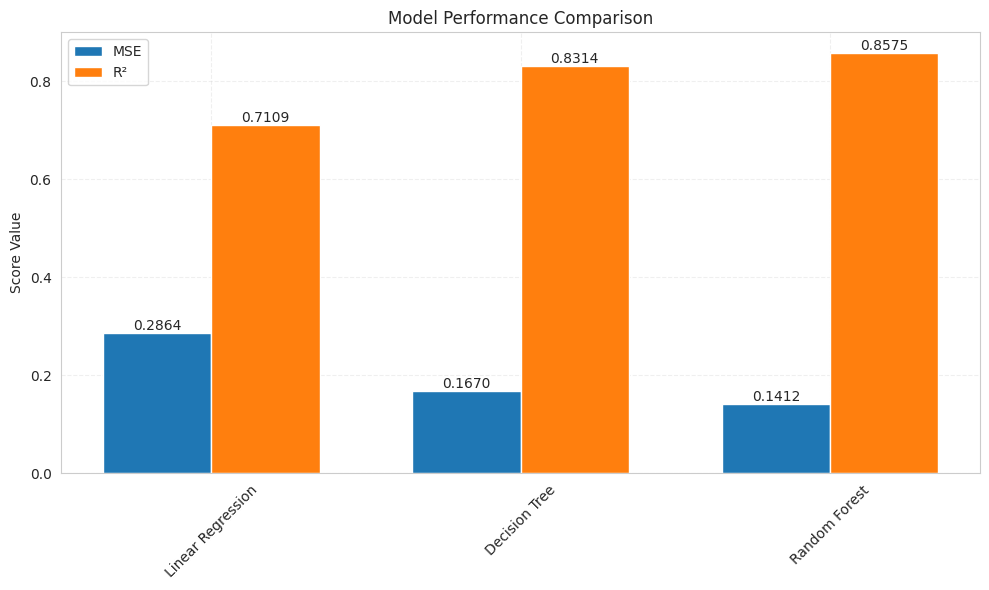

In [ ]:
plt.figure(figsize=(10, 6))
width = 0.35
x = np.arange(len(table['Model']))
mse_bars = plt.bar(x - width/2, table['MSE'], width, label='MSE', color='#1f77b4')
r2_bars = plt.bar(x + width/2, table['R-squared'], width, label='R²', color='#ff7f0e')
plt.title('Model Performance Comparison')
plt.ylabel('Score Value')
plt.xticks(x, table['Model'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)
for bars in [mse_bars, r2_bars]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}' if bar.get_label() == 'MSE' else f'{height:.4f}',
                ha='center', va='bottom')
plt.legend()
plt.tight_layout()
plt.show()

# ***Section 4: Reporting & Insights***


---

## **Section 4: Reporting & Insights**  
### **4.1 Summary of Findings**  

---

#### **31. Key Insights Gained from EDA on Car Prices**  
- **Strong Associations with Technical Attributes**:  
  Exploratory Data Analysis revealed that engine-related specifications like **`engine-size`**, **`horsepower`**, and **`curb-weight`** had the most significant positive correlation with car prices. Larger engines and heavier vehicles typically indicate premium performance or luxury status.  
- **Brand Influence**:  
  Luxury brands such as **BMW**, **Mercedes-Benz**, and **Jaguar** consistently showed higher price points, underscoring the strong role of brand reputation in market valuation. In contrast, economy brands like **Chevrolet** and **Honda** tended to be more budget-friendly.  
- **Fuel Efficiency Trade-off**:  
  Features like **`city-mpg`** and **`highway-mpg`** demonstrated a negative correlation with price, implying that fuel-efficient cars are generally priced lower, whereas high-performance, fuel-consuming vehicles command a premium.  
- **Body Style Preferences**:  
  Sportier body types such as **convertibles** and **hardtops** were typically priced above sedans and hatchbacks, indicating market preference for aesthetics and luxury.  
- **Missing and Noisy Data**:  
  Columns like **`normalized-losses`** contained numerous missing values (e.g., '?'), requiring careful imputation and cleaning to ensure modeling accuracy.

---

#### **32. Most Influential Features in Price Prediction**  
- **Top Predictors**:  
  1. **Engine Size** – The strongest indicator of price.  
  2. **Horsepower** – Higher horsepower models were notably more expensive.  
  3. **Curb Weight** – Often correlates with vehicle class (luxury/performance).  
  4. **Brand (Make)** – Cars from high-end brands clearly fetched higher prices.  
  5. **Aspiration Type** – Turbocharged vehicles had a noticeable impact on pricing.  
- **Less Significant Factors**:  
  Features like **`num-of-doors`** and **`fuel-type`** showed weak correlation with price, suggesting they contribute minimally to price variation.

---

#### **33. Key Challenges During Preprocessing and Modeling**  
- **Data Inconsistencies**:  
  Numerous missing values (especially in `normalized-losses`, `bore`, `stroke`) and inconsistent formats (`?`, NaN) complicated the cleaning process. We employed **median imputation** for numerical features and **mode** for categorical ones.  
- **Categorical Encoding**:  
  Transforming non-numeric features such as `make`, `body-style`, and `drive-wheels` required thoughtful encoding strategies (e.g., **one-hot** and **label encoding**) to prepare the data for machine learning algorithms.  
- **Feature Scaling**:  
  Normalizing continuous features like `engine-size` and `horsepower` was crucial, especially for models like **Linear Regression**, to ensure consistent influence across features.  
- **Model-Specific Challenges**:  
  - **Overfitting**: Tree-based models, particularly **Decision Trees**, initially overfitted the training data. Hyperparameter tuning like `max_depth` helped generalize performance.  
  - **Interpretability**: While **Linear Regression** offered clear coefficient-based insights, models like **Random Forest** required feature importance plots to interpret behavior.

---

#### **34. Steps for Handling a Larger Dataset with More Features**  
If provided with a more complex dataset, the following steps would enhance modeling efficiency and performance:

1. **Advanced Feature Engineering**:  
   - Develop interaction terms (e.g., `engine-size × horsepower`) or polynomial features to capture non-linear relationships.  
   - Derive new features like **vehicle age**, if manufacturing year is available.

2. **Dimensionality Reduction Techniques**:  
   - Apply **Principal Component Analysis (PCA)** or **t-SNE** to manage high-dimensional data and reduce redundancy or noise.

3. **Model Optimization & Hyperparameter Tuning**:  
   - Utilize **GridSearchCV**, **RandomizedSearch**, or **Bayesian Optimization** for fine-tuning.  
   - Experiment with advanced models such as **XGBoost**, **LightGBM**, or **deep neural networks** for enhanced predictive performance.

4. **Feature Selection for Scalability**:  
   - Use techniques like **Recursive Feature Elimination (RFE)** or **SHAP values** to identify the most impactful features and improve model explainability.

5. **Data Augmentation**:  
   - Consider generating synthetic samples for underrepresented categories (e.g., luxury or rare brands) to balance the dataset.

6. **End-to-End Pipeline Automation**:  
   - Build robust, scalable pipelines using tools like **`ColumnTransformer`**, **`Pipeline`**, and version control to ensure reproducibility and modularity.

---
